In [1]:
#%pip install statsmodels
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
model = smf.ols('tip ~ total_bill', data = tips)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.69e-34
Time:                        16:34:39   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [3]:
model = smf.ols('tip ~ total_bill + size', data = tips)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           9.67e-34
Time:                        16:36:31   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

In [4]:
results2 = sm.OLS(tips['tip'], tips['total_bill']).fit()
print(results2.summary())


                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2004.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                   2.26e-119
Time:                        16:40:47   Log-Likelihood:                         -366.22
No. Observations:                 244   AIC:                                      734.4
Df Residuals:                     243   BIC:                                      737.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [5]:
tips3 = sm.add_constant(tips)
results3 = sm.OLS(tips3['tip'], tips3[['const', 'total_bill']]).fit()
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.69e-34
Time:                        16:42:10   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

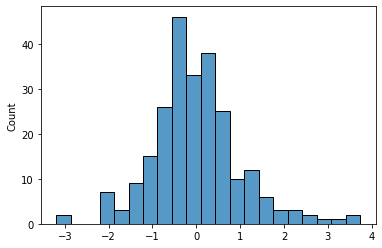

In [6]:
pred_val = results3.fittedvalues.copy()
residual = tips3['tip'] - pred_val
fig = sns.histplot(residual)

C:\Users\rgarg28\AppData\Local\Temp\ipykernel_21440\3802917871.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


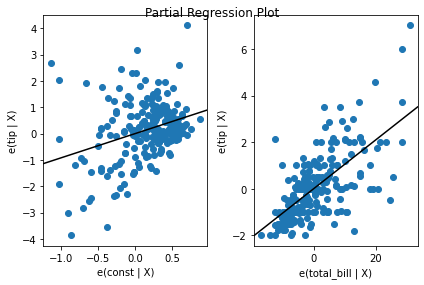

In [7]:
fig = sm.graphics.plot_partregress_grid(results3)
fig.show()

In [8]:
diamond = sns.load_dataset("diamonds")
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
print(diamond['cut'].unique())
print(diamond['color'].unique())
print(diamond['clarity'].unique())


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['E', 'I', 'J', 'H', 'F', 'G', 'D']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [10]:
modelD = smf.ols('price ~ carat + cut + color + clarity', data=diamond).fit()
print(modelD.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:48:24   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53921   BIC:                         9.142e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -944.9009     31.395  

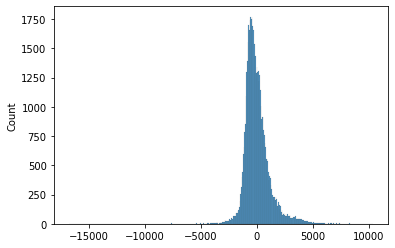

In [11]:
pred_val = modelD.fittedvalues.copy()
residual = diamond['price'] - pred_val
fig = sns.histplot(residual)

In [12]:
diamond['priceHigh'] = pd.cut(diamond['price'], [0, diamond.price.median(), diamond.price.max()], labels=[0,1])

diamond['priceHighInt'] = diamond['priceHigh'].astype(int)

diamond.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,priceHigh,priceHighInt
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0


In [13]:
resultDL = smf.logit('priceHighInt ~ carat + cut + color + clarity', data=diamond).fit()
resultDL.summary()


Optimization terminated successfully.
         Current function value: 0.051676
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           priceHighInt   No. Observations:                53940
Model:                          Logit   Df Residuals:                    53921
Method:                           MLE   Df Model:                           18
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.9254
Time:                        16:52:07   Log-Likelihood:                -2787.4
converged:                       True   LL-Null:                       -37388.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -24.6694      0.517    -47.722      0.000     -25.683     -23.656
cut[T.Premium]      -1.3996      0.100    -13.947      0.000      -1.596      -1.203
cut[T.Very Good]    -1.1478      0.093    -12.354      0.000      -1.330      -0.966
cut[T.Good]         -1.9506      0.132    -14.755      0.000      -2.210      -1.691
cut[T.Fair]         -3.7389      0.197    -18.990      0.000      -4.125      -3.353
color[T.E]          -0.7607      0.126     -6.048      0.000      -1.007      -0.514
color[T.F]          -2.1179      0.129    -16.460      0.000      -2.370      -1.866
color[T.G]          -3.3514      0.140    -23.969      0.000      -3.625      -3.077
color[T.H]          -4.6340      0.163    -28.469      0.000      -4.953      -4.315
color[T.I]          -6.6811      0.197    -33.903      0.000      -7.067      -6.295
color[T.J]          -9.9425      0.290    -34.308      0.000     -10.511      -9.375
clarity[T.VVS1]     -0.8008      0.244     -3.286      0.001      -1.278      -0.323
clarity[T.VVS2]     -2.3487      0.231    -10.177      0.000      -2.801      -1.896
clarity[T.VS1]      -4.9988      0.243    -20.564      0.000      -5.475      -4.522
clarity[T.VS2]      -5.9529      0.245    -24.264      0.000      -6.434      -5.472
clarity[T.SI1]      -7.9147      0.264    -29.991      0.000      -8.432      -7.397
clarity[T.SI2]     -10.4559      0.297    -35.214      0.000     -11.038      -9.874
clarity[T.I1]      -20.2182      0.500    -40.397      0.000     -21.199     -19.237
carat               50.6453      0.968     52.299      0.000      48.747      52.543
====================================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [14]:
import numpy as np
odds_ratio = np.exp(resultDL.params)
print(odds_ratio)

Intercept           1.932847e-11
cut[T.Premium]      2.467076e-01
cut[T.Very Good]    3.173394e-01
cut[T.Good]         1.421888e-01
cut[T.Fair]         2.378120e-02
color[T.E]          4.673326e-01
color[T.F]          1.202890e-01
color[T.G]          3.503576e-02
color[T.H]          9.716025e-03
color[T.I]          1.254398e-03
color[T.J]          4.808638e-05
clarity[T.VVS1]     4.489657e-01
clarity[T.VVS2]     9.549197e-02
clarity[T.VS1]      6.745736e-03
clarity[T.VS2]      2.598242e-03
clarity[T.SI1]      3.653418e-04
clarity[T.SI2]      2.877872e-05
clarity[T.I1]       1.657063e-09
carat               9.884869e+21
dtype: float64


In [15]:
randhie = sm.datasets.randhie.load_pandas()
randhie.data.head()


,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp
0,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
1,2,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
2,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
3,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0
4,0,4.61512,1,6.907755,0.0,0.0,13.73189,1,0,0


In [16]:
resultRAND = smf.poisson('mdvis ~ idp + lpi + fmde + physlm + disea + hlthf + hlthp', data = randhie.data).fit()
resultRAND.summary()


Optimization terminated successfully.
         Current function value: 3.100251
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  mdvis   No. Observations:                20190
Model:                        Poisson   Df Residuals:                    20182
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                 0.06081
Time:                        16:56:36   Log-Likelihood:                -62594.
converged:                       True   LL-Null:                       -66647.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6926      0.011     64.040      0.000       0.671       0.714
idp           -0.1950      0.010    -19.357      0.000      -0.215      -0.175
lpi            0.0279      0.002     15.739      0.000       0.024       0.031
fmde          -0.0497      0.001    -36.703      0.000      -0.052      -0.047
physlm         0.2791      0.012     22.958      0.000       0.255       0.303
disea          0.0333      0.001     59.378      0.000       0.032       0.034
hlthf          0.0581      0.015      3.992      0.000       0.030       0.087
hlthp          0.2323      0.026      9.060      0.000       0.182       0.283
==============================================================================
"""

In [17]:
from nba_api.stats import endpoints
data = endpoints.leagueleaders.LeagueLeaders() 
df = data.league_leaders.get_data_frame()
df.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201142,1,Kevin Durant,BKN,12,446,125,241,0.519,19,...,78,64,11,23,40,29,370,381,1.60,0.28
1,1629029,2,Luka Doncic,DAL,10,366,119,239,0.498,24,...,82,81,20,7,32,34,348,360,2.53,0.63
2,1628369,3,Jayson Tatum,BOS,11,409,110,221,0.498,39,...,76,45,9,16,28,23,343,338,1.61,0.32
3,201939,4,Stephen Curry,GSW,10,351,108,211,0.512,53,...,71,69,11,1,26,21,326,345,2.65,0.42
4,1628378,5,Donovan Mitchell,CLE,10,392,113,220,0.514,43,...,42,58,13,6,34,32,319,289,1.71,0.38


In [18]:
model = smf.ols('PTS ~ FGA', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:00:33   Log-Likelihood:                -1856.5
No. Observations:                 449   AIC:                             3717.
Df Residuals:                     447   BIC:                             3725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2045      1.074     -2.052      0.0